![Los Angeles skyline](la_skyline.jpg)

Los Angeles, California 😎. The City of Angels. Tinseltown. The Entertainment Capital of the World! 

Known for its warm weather, palm trees, sprawling coastline, and Hollywood, along with producing some of the most iconic films and songs. However, as with any highly populated city, it isn't always glamorous and there can be a large volume of crime. That's where you can help!

You have been asked to support the Los Angeles Police Department (LAPD) by analyzing crime data to identify patterns in criminal behavior. They plan to use your insights to allocate resources effectively to tackle various crimes in different areas.

## The Data

They have provided you with a single dataset to use. A summary and preview are provided below.

It is a modified version of the original data, which is publicly available from Los Angeles Open Data.

# crimes.csv

| Column     | Description              |
|------------|--------------------------|
| `'DR_NO'` | Division of Records Number: Official file number made up of a 2-digit year, area ID, and 5 digits. |
| `'Date Rptd'` | Date reported - MM/DD/YYYY. |
| `'DATE OCC'` | Date of occurrence - MM/DD/YYYY. |
| `'TIME OCC'` | In 24-hour military time. |
| `'AREA NAME'` | The 21 Geographic Areas or Patrol Divisions are also given a name designation that references a landmark or the surrounding community that it is responsible for. For example, the 77th Street Division is located at the intersection of South Broadway and 77th Street, serving neighborhoods in South Los Angeles. |
| `'Crm Cd Desc'` | Indicates the crime committed. |
| `'Vict Age'` | Victim's age in years. |
| `'Vict Sex'` | Victim's sex: `F`: Female, `M`: Male, `X`: Unknown. |
| `'Vict Descent'` | Victim's descent:<ul><li>`A` - Other Asian</li><li>`B` - Black</li><li>`C` - Chinese</li><li>`D` - Cambodian</li><li>`F` - Filipino</li><li>`G` - Guamanian</li><li>`H` - Hispanic/Latin/Mexican</li><li>`I` - American Indian/Alaskan Native</li><li>`J` - Japanese</li><li>`K` - Korean</li><li>`L` - Laotian</li><li>`O` - Other</li><li>`P` - Pacific Islander</li><li>`S` - Samoan</li><li>`U` - Hawaiian</li><li>`V` - Vietnamese</li><li>`W` - White</li><li>`X` - Unknown</li><li>`Z` - Asian Indian</li> |
| `'Weapon Desc'` | Description of the weapon used (if applicable). |
| `'Status Desc'` | Crime status. |
| `'LOCATION'` | Street address of the crime. |

In [1]:
# Re-run this cell
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
crimes = pd.read_csv("crimes.csv", parse_dates=["Date Rptd", "DATE OCC"], dtype={"TIME OCC": str})
crimes.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION
0,220314085,2022-07-22,2020-05-12,1110,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont,2500 S SYCAMORE AV
1,222013040,2022-08-06,2020-06-04,1620,Olympic,THEFT OF IDENTITY,60,M,H,NaN,Invest Cont,3300 SAN MARINO ST
2,220614831,2022-08-18,2020-08-17,1200,Hollywood,THEFT OF IDENTITY,28,M,H,NaN,Invest Cont,1900 TRANSIENT
3,231207725,2023-02-27,2020-01-27,0635,77th Street,THEFT OF IDENTITY,37,M,H,NaN,Invest Cont,6200 4TH AV
4,220213256,2022-07-14,2020-07-14,0900,Rampart,THEFT OF IDENTITY,79,M,B,NaN,Invest Cont,1200 W 7TH ST


## Explore the crimes.csv dataset and use your findings to answer the following questions:

#### Which hour has the highest frequency of crimes? Store as an integer variable called peak_crime_hour.



In [2]:

# Load the CSV data
crimes_df = pd.read_csv('crimes.csv')

# Extract the hour from the 'TIME OCC' column
crimes_df['HOUR OCC'] = crimes_df['TIME OCC'] // 100  # Convert to integer hour

# Count the frequency of each hour
hourly_crime_counts = crimes_df['HOUR OCC'].value_counts()

# Determine the hour with the highest frequency of crimes
peak_crime_hour = hourly_crime_counts.idxmax()

# Display the result
peak_crime_hour


12

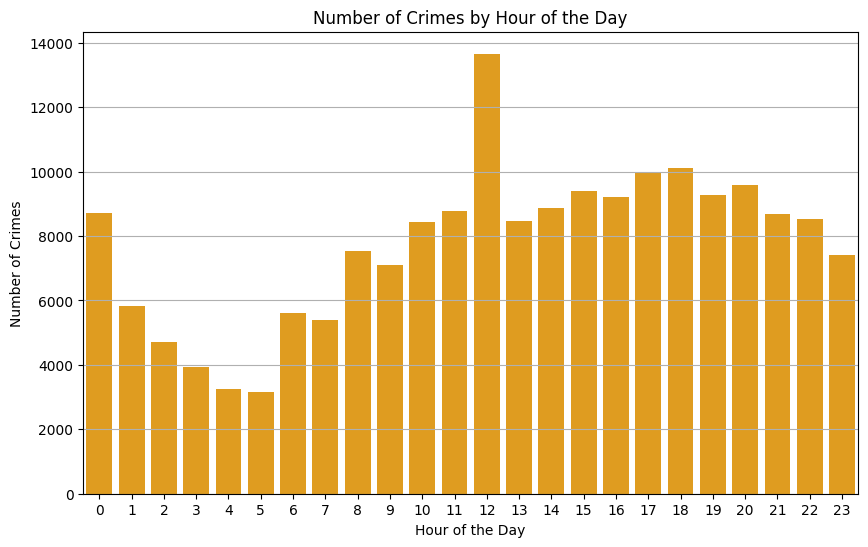

In [5]:
# Create the plot
plt.figure(figsize=(10, 6))
sns.barplot(x=hourly_crime_counts.index, y=hourly_crime_counts.values, color='orange')

# Adding labels and title
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Crimes')
plt.title('Number of Crimes by Hour of the Day')
plt.xticks(rotation=0)  # Keep the x labels horizontal for readability
plt.grid(axis='y')  # Add grid lines for better readability

# Show the plot
plt.show()

#### Which area has the largest frequency of night crimes (crimes committed between 10pm and 3:59am)? Save as a string variable called peak_night_crime_location.



In [6]:
# Filter for night crimes (10 PM to 3:59 AM)
night_crimes_df = crimes_df[(crimes_df['HOUR OCC'] >= 22) | (crimes_df['HOUR OCC'] <= 3)]

# Group by 'AREA NAME' and count the frequency of crimes
night_crime_counts = night_crimes_df['AREA NAME'].value_counts()

# Identify the area with the largest frequency of night crimes
peak_night_crime_location = night_crime_counts.idxmax()

# Display the result
peak_night_crime_location

'Central'

In [7]:
night_crime_counts

AREA NAME
Central        3312
Hollywood      2699
77th Street    2558
Southwest      2347
Southeast      2218
Newton         2142
Olympic        2137
Pacific        1916
Rampart        1860
N Hollywood    1855
Wilshire       1716
Northeast      1684
Van Nuys       1629
West Valley    1520
Topanga        1461
Mission        1453
Harbor         1384
West LA        1369
Devonshire     1348
Hollenbeck     1315
Foothill       1260
Name: count, dtype: int64

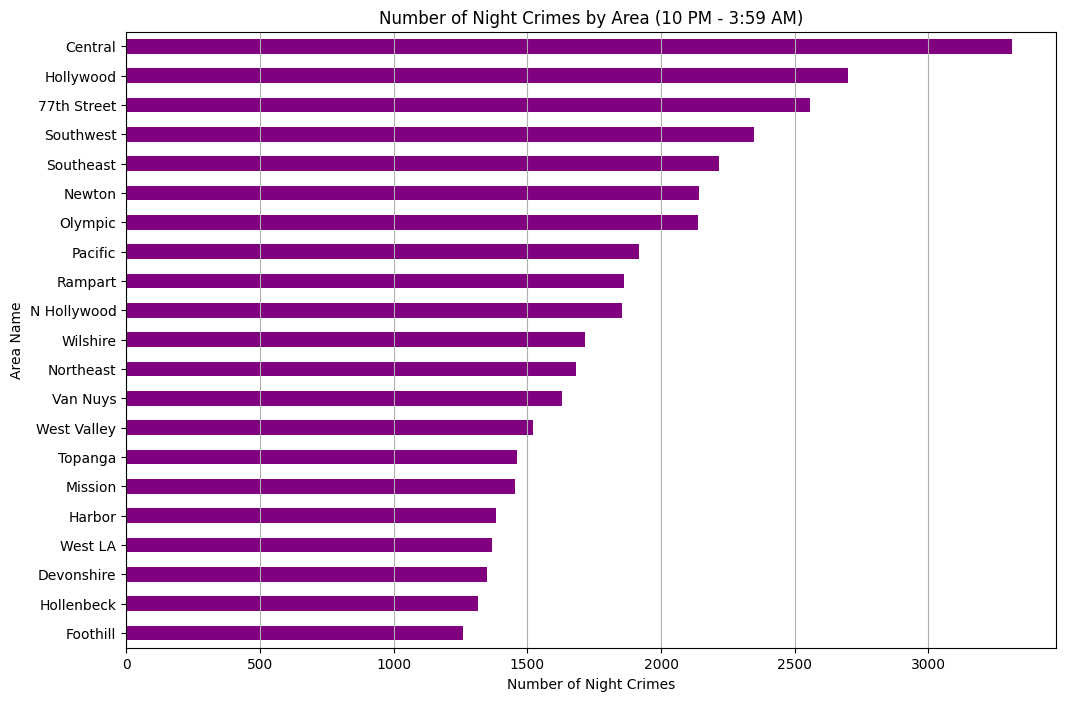

In [13]:
# Plotting the data
plt.figure(figsize=(12, 8))
night_crime_counts.sort_values().plot(kind='barh', color='purple')

# Adding labels and title
plt.xlabel('Number of Night Crimes')
plt.ylabel('Area Name')
plt.title('Number of Night Crimes by Area (10 PM - 3:59 AM)')
plt.grid(axis='x')  # Add grid lines for better readability

# Show the plot
plt.show()

#### Identify the number of crimes committed against victims of different age groups. Save as a pandas Series called victim_ages, with age group labels "0-17", "18-25", "26-34", "35-44", "45-54", "55-64", and "65+" as the index and the frequency of crimes as the values.

In [18]:

# Define the age bins and corresponding labels
age_bins = [0, 17, 25, 34, 44, 54, 64, float('inf')]
age_labels = ["0-17", "18-25", "26-34", "35-44", "45-54", "55-64", "65+"]

# Categorize ages into bins
crimes_df['Age Group'] = pd.cut(crimes_df['Vict Age'], bins=age_bins, labels=age_labels, right=True)

# Count the number of crimes in each age group
victim_ages = crimes_df['Age Group'].value_counts().sort_index()

# Display the result
victim_ages


Age Group
0-17      4528
18-25    28291
26-34    47470
35-44    42157
45-54    28353
55-64    20169
65+      14747
Name: count, dtype: int64

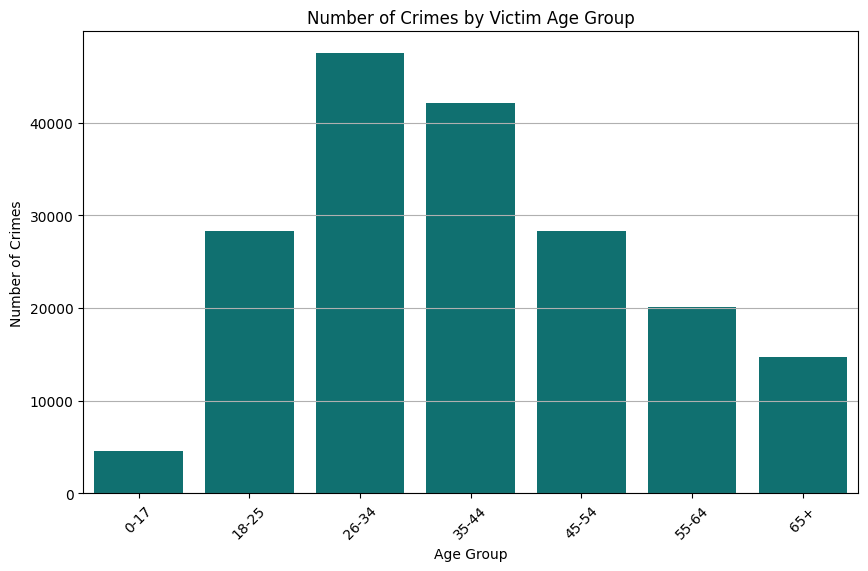

In [21]:

# Create a DataFrame for plotting
plot_df = victim_ages.reset_index()
plot_df.columns = ['Age Group', 'Number of Crimes']

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Age Group', y='Number of Crimes', data=plot_df, color='teal')  # Use color instead of palette

# Adding labels and title
plt.xlabel('Age Group')
plt.ylabel('Number of Crimes')
plt.title('Number of Crimes by Victim Age Group')
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.grid(axis='y')  # Add grid lines for better readability

# Show the plot
plt.show()

